## 1. Understand the data.
<p>In this assignment, you will delve into the exciting journey of machine learning by applying predictive analytics to solve a real-world problem: condo price prediction. This lab will provide you with hands-on experience in building and evaluating machine learning models using Python and popular libraries such as scikit-learn.</p>
<p>Step 1: As usual, understanding the data is the first step of your machine learning project.</p>

In [1]:
# Importing the pandas package
import pandas as pd

# Reading in condo_price_cm.csv, which is comma delimited.
df=pd.read_csv('BangkokHousingPrices.csv')

# Print the number of features, number of data points
print(df.shape)

# Print the name of the features of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

# Print the information of the dataset and check data types
df.info()


(563, 6)
Index(['Property-Type', 'Location', 'Area', 'Bedrooms', 'Bathrooms', 'Price'], dtype='object')
Index(['Property-Type', 'Location', 'Area', 'Bedrooms', 'Bathrooms', 'Price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property-Type  563 non-null    object
 1   Location       563 non-null    object
 2   Area           563 non-null    int64 
 3   Bedrooms       563 non-null    int64 
 4   Bathrooms      563 non-null    int64 
 5   Price          563 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.5+ KB


2. Encoding The Features
There are two categorical features: Property-Type and Location. We used the encoder function from the sklearn library to encode these two columns as shown below.

In [2]:
X=df.iloc[:,df.columns!="Price"]
y=df['Price']

from sklearn.preprocessing import LabelEncoder
df['Property']=LabelEncoder().fit_transform(df['Property-Type'].values.reshape(-1,1))
df['Location-1']=LabelEncoder().fit_transform(df['Location'].values.reshape(-1,1))
df

c:\Users\Tania Thanda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Tania Thanda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Property-Type,Location,Area,Bedrooms,Bathrooms,Price,Property,Location-1
0,Condo,Sukhumvit,700,1,1,2000000,1,8
1,House,Ladprao,1500,3,2,5000000,2,2
2,Apartment,Siam,900,2,1,3500000,0,6
3,Condo,Sathorn,1200,2,2,4500000,1,5
4,House,Ratchada,1800,4,3,8000000,2,4
...,...,...,...,...,...,...,...,...
558,House,Ekkamai,400,5,4,6000000,2,1
559,Apartment,Sukhumvit,20,1,1,500000,0,8
560,Condo,Ladprao,20,2,1,800000,1,2
561,House,Siam,20,3,2,1600000,2,6


## 2. Data Splitting 
<p>Data splitting, also known as data partitioning or data splitting, is a crucial step in machine learning model development. It involves dividing a dataset into multiple subsets for different purposes, typically training and testing/validation. </p>


In [3]:
# select the dependent and target
sel_feature = ['Property', 'Area', 'Location-1']
X=df[sel_feature].values
y=df['Price'].values

# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3, 
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)


(394, 3) (169, 3)


## 3. Use scikit-learn pipeline 
<p>Pipelines allow for the seamless integration of multiple preprocessing steps (e.g., feature scaling, imputation) and the model training process into a single object. This simplifies the overall workflow and reduces the likelihood of errors or inconsistencies in data preprocessing and modeling steps.</p>

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()), 
         ('poly', PolynomialFeatures(degree = 7, 
                                     include_bias=False)),
         ('liReg', LinearRegression())]

parameters = {"poly__degree":[7]}
pipeline = Pipeline(steps)


poly_grid = GridSearchCV(pipeline, parameters, 
                         cv=5, 
                         scoring='neg_mean_squared_error',
                         verbose= True) 

poly_grid.fit(X_test, y_test)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(degree=7,
                                                           include_bias=False)),
                                       ('liReg', LinearRegression())]),
             param_grid={'poly__degree': [7]}, scoring='neg_mean_squared_error',
             verbose=True)

## 4. Check the parameters
<p>Retrieves the value of the parameters corresponding to the minimum cost.</p>

In [113]:
best_parameters = poly_grid.best_params_

# print the values of the parameters 
print ('best order is :', best_parameters)



best order is : {'poly__degree': 7}


## 5. Perform the predictions
<p>Now that we have identified the best parameters corresponding to the minimum cost. Make predictions using the function <b>predict</b> from Python scikit-learn moduel</p>

In [114]:
import numpy as np
# predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)

print ('The prediction for Degree 9')
df_train_result = pd.DataFrame({'Actual-values': y_train, 'Predict_values': np.round(ytrain_pred)})
df_train_result

The prediction for Degree 9


,Actual-values,Predict_values
0,3500000,3376147.0
1,900000,1044149.0
2,3600000,3659979.0
3,10000000,9983572.0
4,3000000,3014897.0
...,...,...
389,10000000,9991636.0
390,2400000,2323590.0
391,8800000,8797875.0
392,1300000,1268775.0


## 6. Visualize the results.
<p>Draw a scatter plot to visualize the relationship between the selected program variable (sel_feature) and the sales data, along with the predicted sales based on the best parameters.</p>

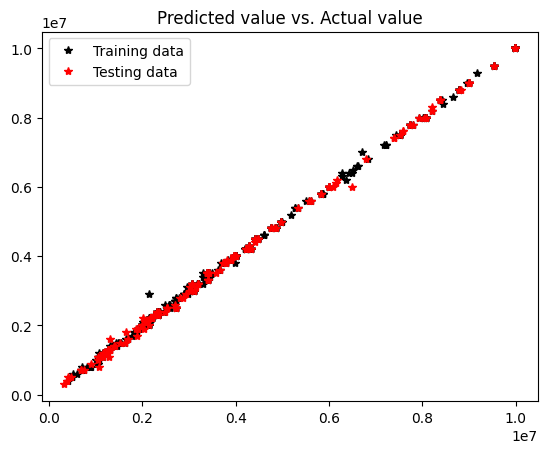

In [115]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(ytrain_pred,  y_train, 'k*')
plt.plot(ytest_pred,  y_test, 'r*') 
 
plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()

## 7. Evaluate the results using metrics

<p>Evaluating the performance of the trained linear regression model is crucial for assessing model fit, detecting overfitting, understanding prediction accuracy, comparing models, iteratively improving the model, and establishing baseline performance. </p>
<p>The model's performance should be evaluated on both the trained data and test data sets for ensuring model effectiveness and generalization ability.</p>

In [107]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print ('Degree 9 Result')
# evauate on the training set
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Degree 9 Result
Mean absolute error:  210016.53037964777
Mean squared error:  85295724510.04626
R2 score is:  0.9861862744056394
Mean absolute error:  209285.55277674596
Mean squared error:  82615661036.79189
R2 score is:  0.9873468382625414


## 8. Submit for the grade.
<p>Change the below cell code for the final submission</p>

In [111]:
# Edit the below code to submit. 
import pandas as pd
name = "Group F"
print("Submitted by", name)

poly_mse_all_features = [85295724510, 82615661036] # train_score, test_score
poly_mae_all_features = [210016, 209285] # train_score, test_score
best_degree_all_features = 7 # change to yours

linear_mse_all_features = [0, 0] # train_score, test_score
linear_mae_all_features = [0, 0] # train_score, test_score

selected_feautres = ['Property', 'Area', 'Location-1'] # change your selections
poly_mse_sel_fea = [0, 0] # train_score, test_score
poly_mae_sel_fea = [0, 0] # train_score, test_score
best_degree_sel_features = 7 # change to yours

linear_mse_sel_fea = [0, 0] # train_score, test_score
linear_mae_sel_fea = [0, 0] # train_score, test_score


## do not change the below codes: 
print(f"The best poly degree using all featurs is {best_degree_all_features}")
print(f"The features selected are: {selected_feautres}")
print(f"The best degree using selected featurs is {best_degree_sel_features}")
variable_names = [
    "poly_mse_all_features",
    "poly_mae_all_features",
    "linear_mse_all_features",
    "linear_mae_all_features",
    "poly_mse_sel_fea",
    "poly_mae_sel_fea",
    "linear_mse_sel_fea",
    "linear_mae_sel_fea"
]

values  = [globals()[name] for name in variable_names]
tr_result = [val[0] for val in values]
test_result =  [val[1] for val in values]
df = pd.DataFrame(index = variable_names)
df['Train']= tr_result
df['Test']= test_result

Submitted by Group F
The best poly degree using all featurs is 7
The features selected are: ['Property', 'Area', 'Location-1']
The best degree using selected featurs is 7
